In [2]:
!pip install chardet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import chardet

In [4]:
df = pd.read_csv('/content/50_Startups.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.rename(columns={'Marketing Spend': 'Marketing_Spend'}, inplace=True)

In [9]:
df.rename(columns={'R&D Spend': 'RD_Spend'}, inplace=True)

In [10]:
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


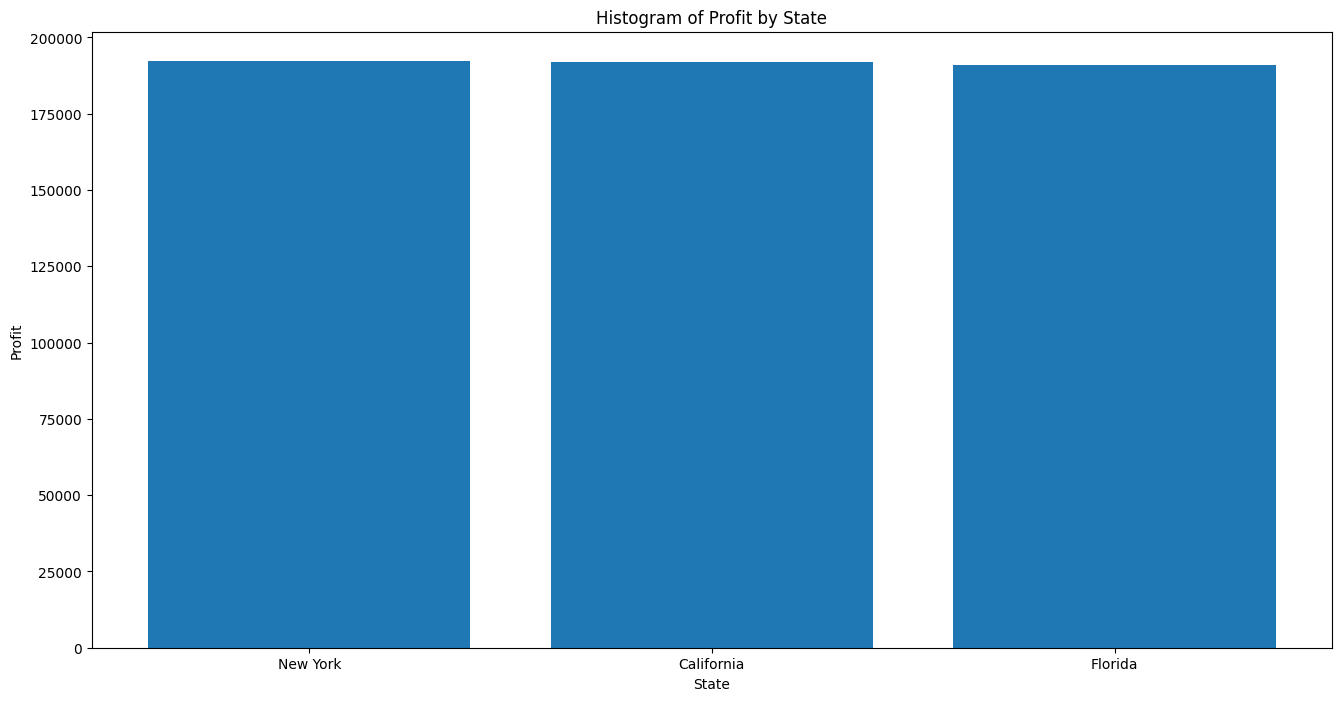

In [11]:
plt.figure(figsize=(16, 8))
plt.bar(df['State'], df['Profit'])
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Histogram of Profit by State')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])

df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [14]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [15]:
df.shape

(50, 5)

In [16]:
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [17]:
data_sort = df[['Profit','RD_Spend','Administration','Marketing_Spend','State']]

In [18]:
x = df.iloc[:, :-1]
x

,RD_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [19]:
y = df.iloc[:, -1]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [20]:
x.corr()

,RD_Spend,Administration,Marketing_Spend,State
RD_Spend,1.000000,0.241955,0.724248,0.104685
Administration,0.241955,1.000000,-0.032154,0.011847
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670
State,0.104685,0.011847,0.077670,1.000000


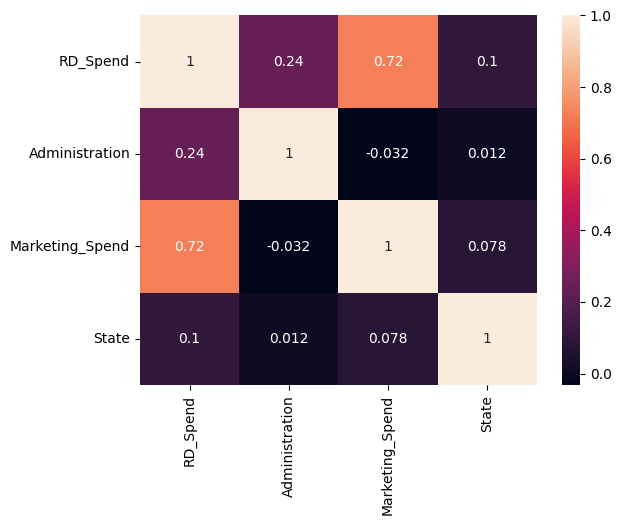

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(x.corr(), annot=True)
plt.show()


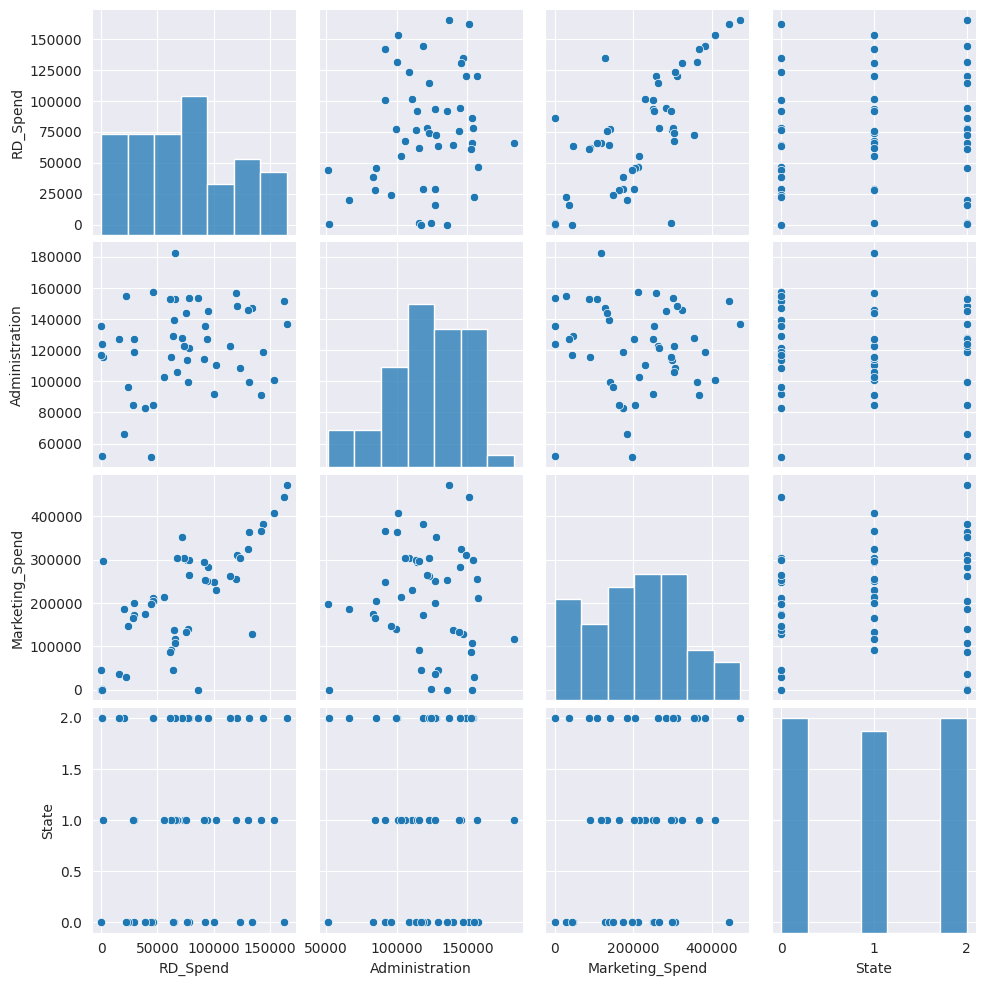

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(x)

<Axes: xlabel='RD_Spend', ylabel='Marketing_Spend'>

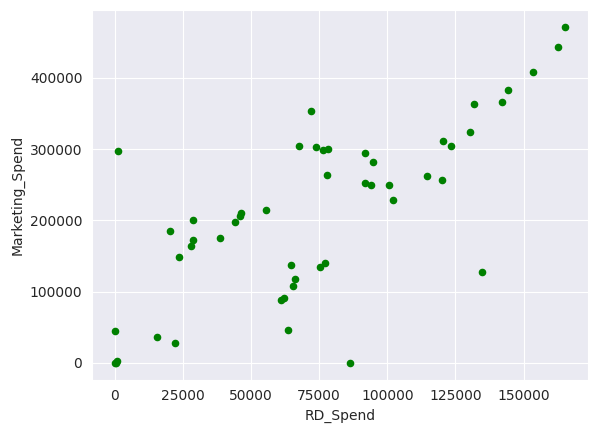

In [23]:
x.plot.scatter(x = 'RD_Spend', y = 'Marketing_Spend', c = 'green')

In [24]:
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
data_sort

,Profit,RD_Spend,Administration,Marketing_Spend,State
0,192261.83,165349.20,136897.80,471784.10,2
1,191792.06,162597.70,151377.59,443898.53,0
2,191050.39,153441.51,101145.55,407934.54,1
3,182901.99,144372.41,118671.85,383199.62,2
4,166187.94,142107.34,91391.77,366168.42,1
5,156991.12,131876.90,99814.71,362861.36,2
6,156122.51,134615.46,147198.87,127716.82,0
7,155752.60,130298.13,145530.06,323876.68,1
8,152211.77,120542.52,148718.95,311613.29,2
9,149759.96,123334.88,108679.17,304981.62,0


In [26]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State', data = data_sort).fit()

In [27]:
model.params

Intercept          50142.506443
RD_Spend               0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [28]:
## t-values and p-values: print(model.tvalues), (model.p-values)
print("**** t_values ****",'\n',model.tvalues, '\n', '****p-values****','\n', model.pvalues)
## p-values of gears and quartile-tax are same
## if the values are greater than 0.05(alpha) then they are not significant
## in this case 'cc' and 'gear' these two wre greater than alpha values other values are significant with the

**** t_values **** 
 Intercept           7.368962
RD_Spend           17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64 
 ****p-values**** 
 Intercept          2.900008e-09
RD_Spend           8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64


In [29]:
## r square value of model
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [30]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_rd = smf.ols('Profit~RD_Spend', data = data_sort).fit()
print(sml_rd.tvalues, '\n', sml_rd.pvalues)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [31]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_rd = smf.ols('Profit~Administration', data = data_sort).fit()
print(sml_rd.tvalues, '\n', sml_rd.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [32]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_rd = smf.ols('Profit~Marketing_Spend', data = data_sort).fit()
print(sml_rd.tvalues, '\n', sml_rd.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [33]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_rd = smf.ols('Profit~State', data = data_sort).fit()
print(sml_rd.tvalues, '\n', sml_rd.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


## calculate VIF

In [34]:
data_sort.head(2)

,Profit,RD_Spend,Administration,Marketing_Spend,State
0,192261.83,165349.2,136897.80,471784.10,2
1,191792.06,162597.7,151377.59,443898.53,0


In [35]:
rsq_profit = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State', data=data_sort).fit().rsquared
rsq_profit = 1/1-rsq_profit

rsq_rd = smf.ols('RD_Spend~Administration+Marketing_Spend+State+Profit', data=data_sort).fit().rsquared
rsq_rd = 1/1-rsq_rd

rsq_adm = smf.ols('Administration~Marketing_Spend+State+Profit+RD_Spend', data=data_sort).fit().rsquared
rsq_adm = 1/1-rsq_adm

rsq_ms = smf.ols('Marketing_Spend~State+Profit+RD_Spend+Administration', data=data_sort).fit().rsquared
rsq_ms = 1/1-rsq_ms

rsq_st = smf.ols('State~Profit+RD_Spend+Administration+Marketing_Spend+State', data=data_sort).fit().rsquared
rsq_st = 1/1-rsq_st

## store vif values
d1 = {'features':['Profit','RD_Spend','Administration','Marketing_Spend','State'], 'VIF':[rsq_profit,rsq_rd,rsq_adm,rsq_ms,rsq_st]}
vif_frame = pd.DataFrame(d1)
vif_frame



,features,VIF
0,Profit,0.049254
1,RD_Spend,0.051080
2,Administration,0.845755
3,Marketing_Spend,0.405624
4,State,0.000000


## i am skipping the aic test beacuse there is no similar rsquare/vif values are around each other

## * Residual Analysis

In [36]:
## Q-Q Plot

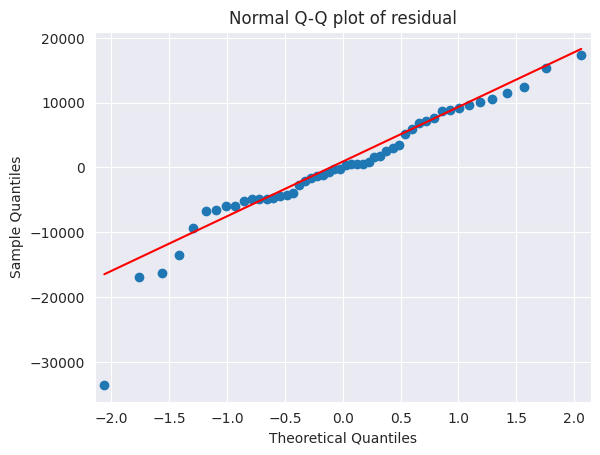

In [37]:
import statsmodels.api as sm
sml_cc = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State', data = data_sort).fit() ## model.resid is error
qqplot=sm.qqplot(model.resid,line='q') ## qq plot  ## when ever we write line='q' then we get 45* line
plt.title("Normal Q-Q plot of residual")  ## points that are away from line are outliers  ## matplotlib
plt.show()

## Standardization

In [38]:
## function defination for dtandardization i.e z score, function name : get_standardized_values
## z-score for standardization
## normalization is called min max sacaling

def get_stanradized_values( data_sort ):
  return (data_sort - data_sort.mean())/data_sort.std()    ## this is z score = (xi - mean)/std.dev

## xi = every point - mean divided by(/) standard deviation

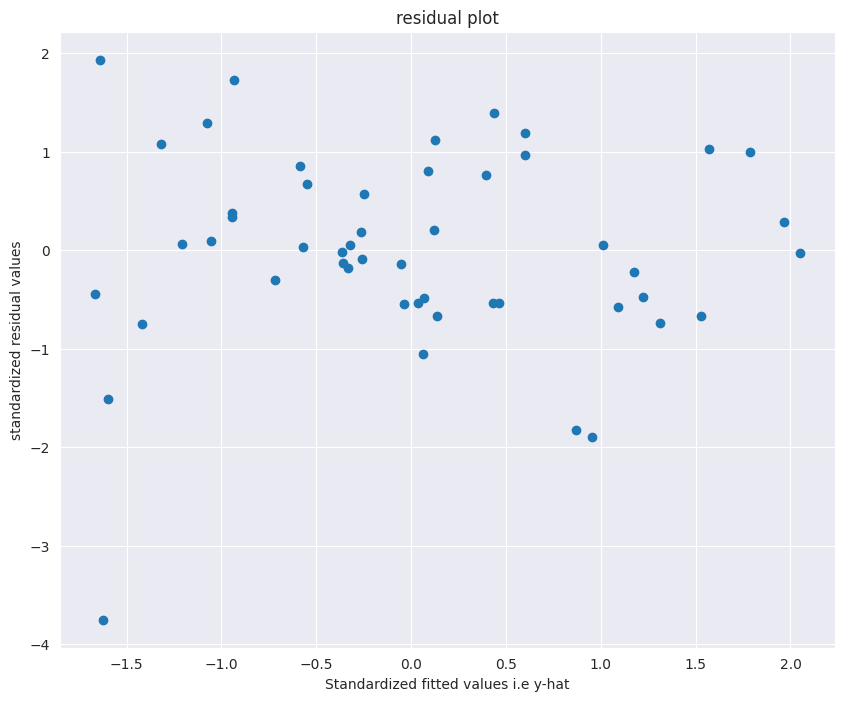

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(get_stanradized_values(model.fittedvalues),   ## fitted value is y hat, model.resid is error
            get_stanradized_values(model.resid))  ## error vs fitted values

plt.title('residual plot')
plt.xlabel('Standardized fitted values i.e y-hat')
plt.ylabel('standardized residual values')
plt.show()

In [40]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [41]:
data_sort

,Profit,RD_Spend,Administration,Marketing_Spend,State
0,192261.83,165349.20,136897.80,471784.10,2
1,191792.06,162597.70,151377.59,443898.53,0
2,191050.39,153441.51,101145.55,407934.54,1
3,182901.99,144372.41,118671.85,383199.62,2
4,166187.94,142107.34,91391.77,366168.42,1
5,156991.12,131876.90,99814.71,362861.36,2
6,156122.51,134615.46,147198.87,127716.82,0
7,155752.60,130298.13,145530.06,323876.68,1
8,152211.77,120542.52,148718.95,311613.29,2
9,149759.96,123334.88,108679.17,304981.62,0


In [42]:
# Check if the model variable is defined
if not 'model' in globals():
    raise ValueError("The 'model' variable is not defined.")

In [43]:
get_stanradized_values

<function __main__.get_stanradized_values(data_sort)>

In [44]:
data_sort.columns

Index(['Profit', 'RD_Spend', 'Administration', 'Marketing_Spend', 'State'], dtype='object')

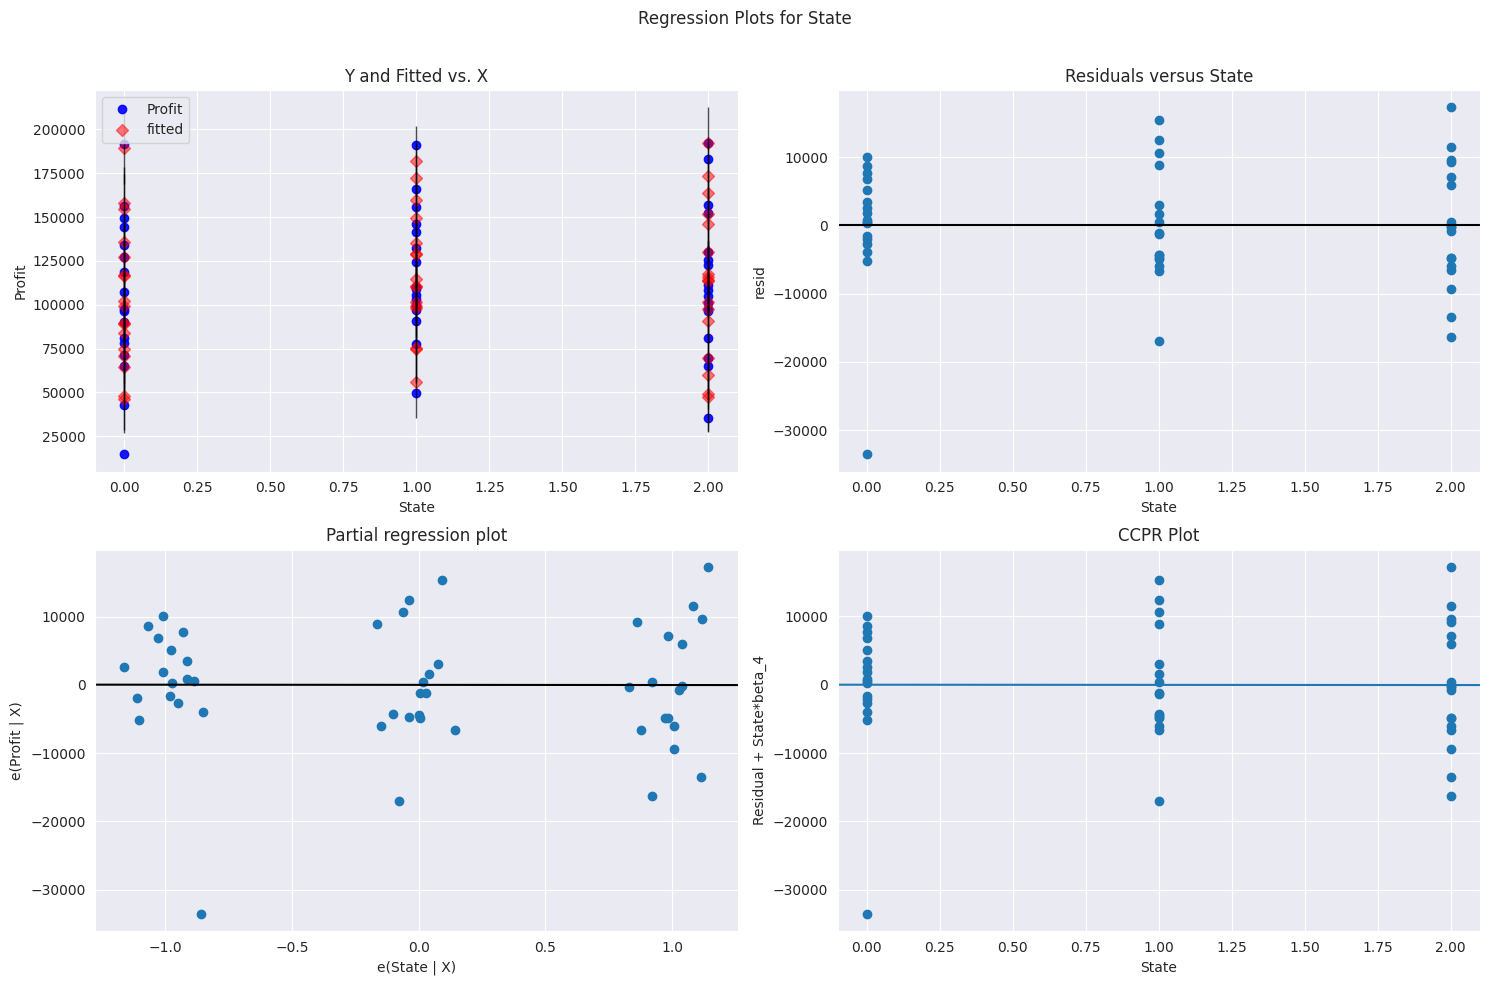

In [45]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"State",  fig=fig)
plt.show()

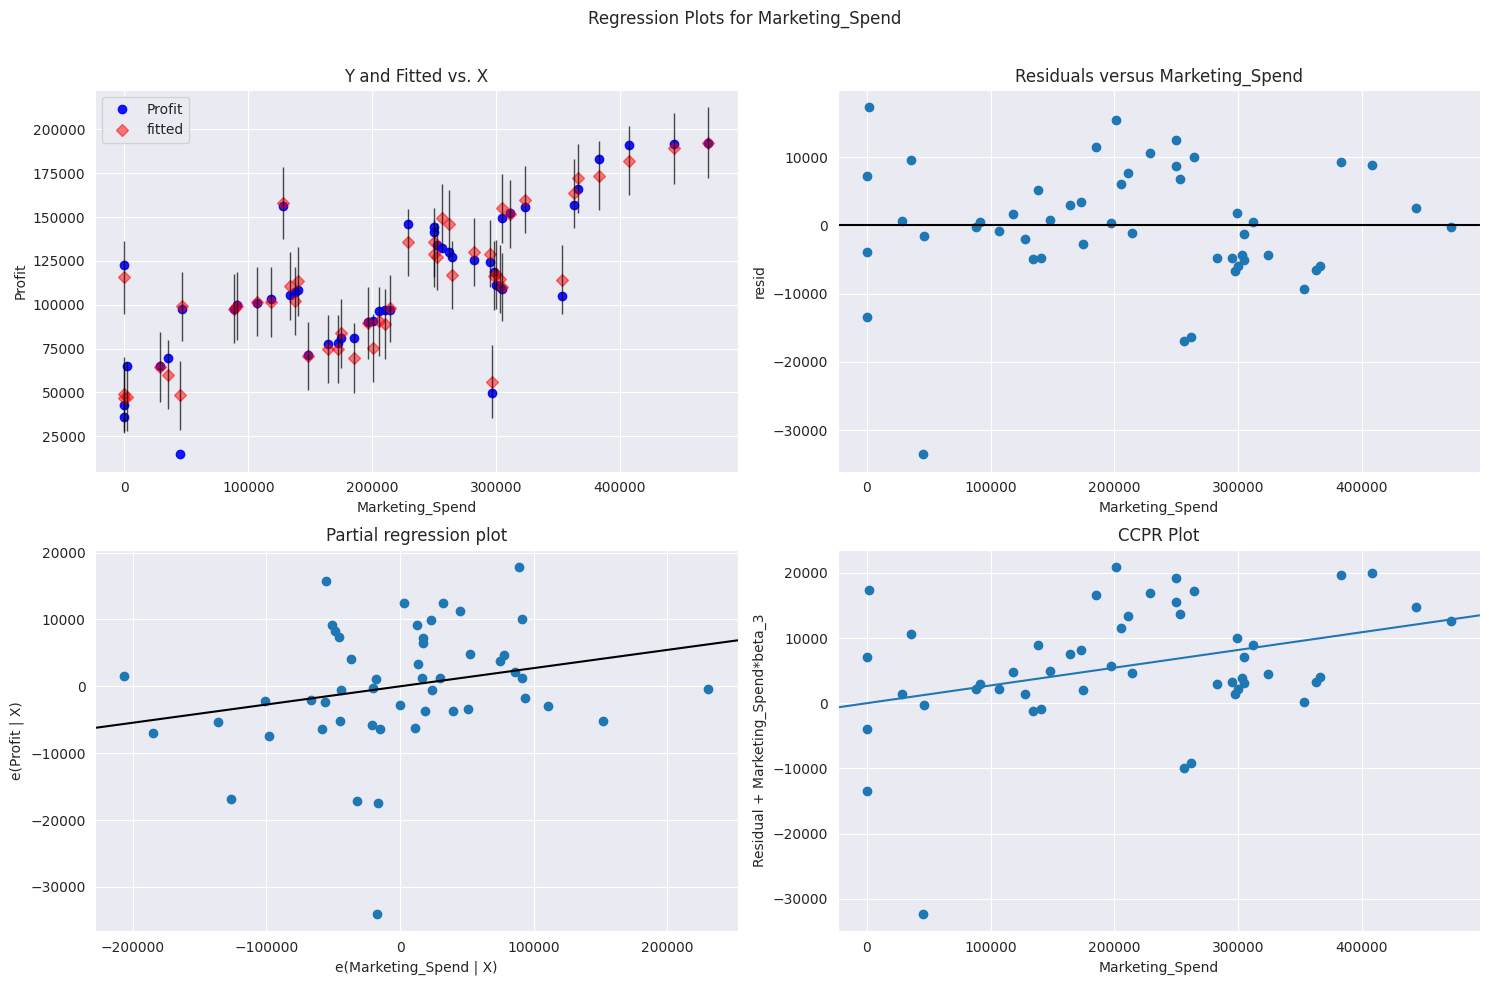

In [46]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Marketing_Spend",  fig=fig)
plt.show()

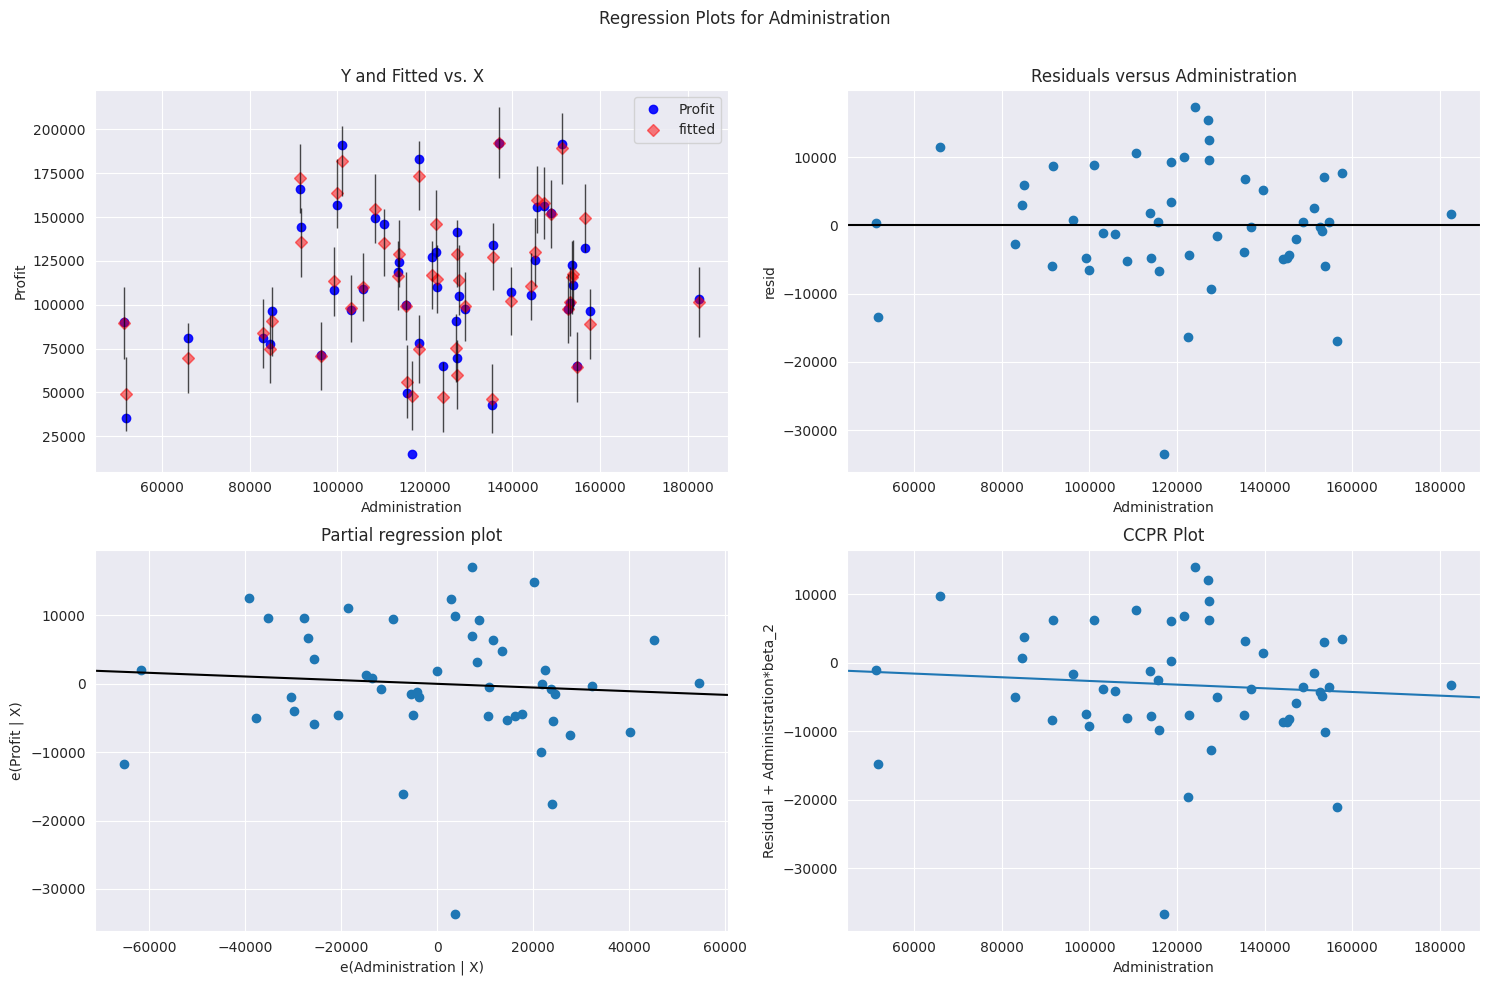

In [47]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Administration",  fig=fig)
plt.show()

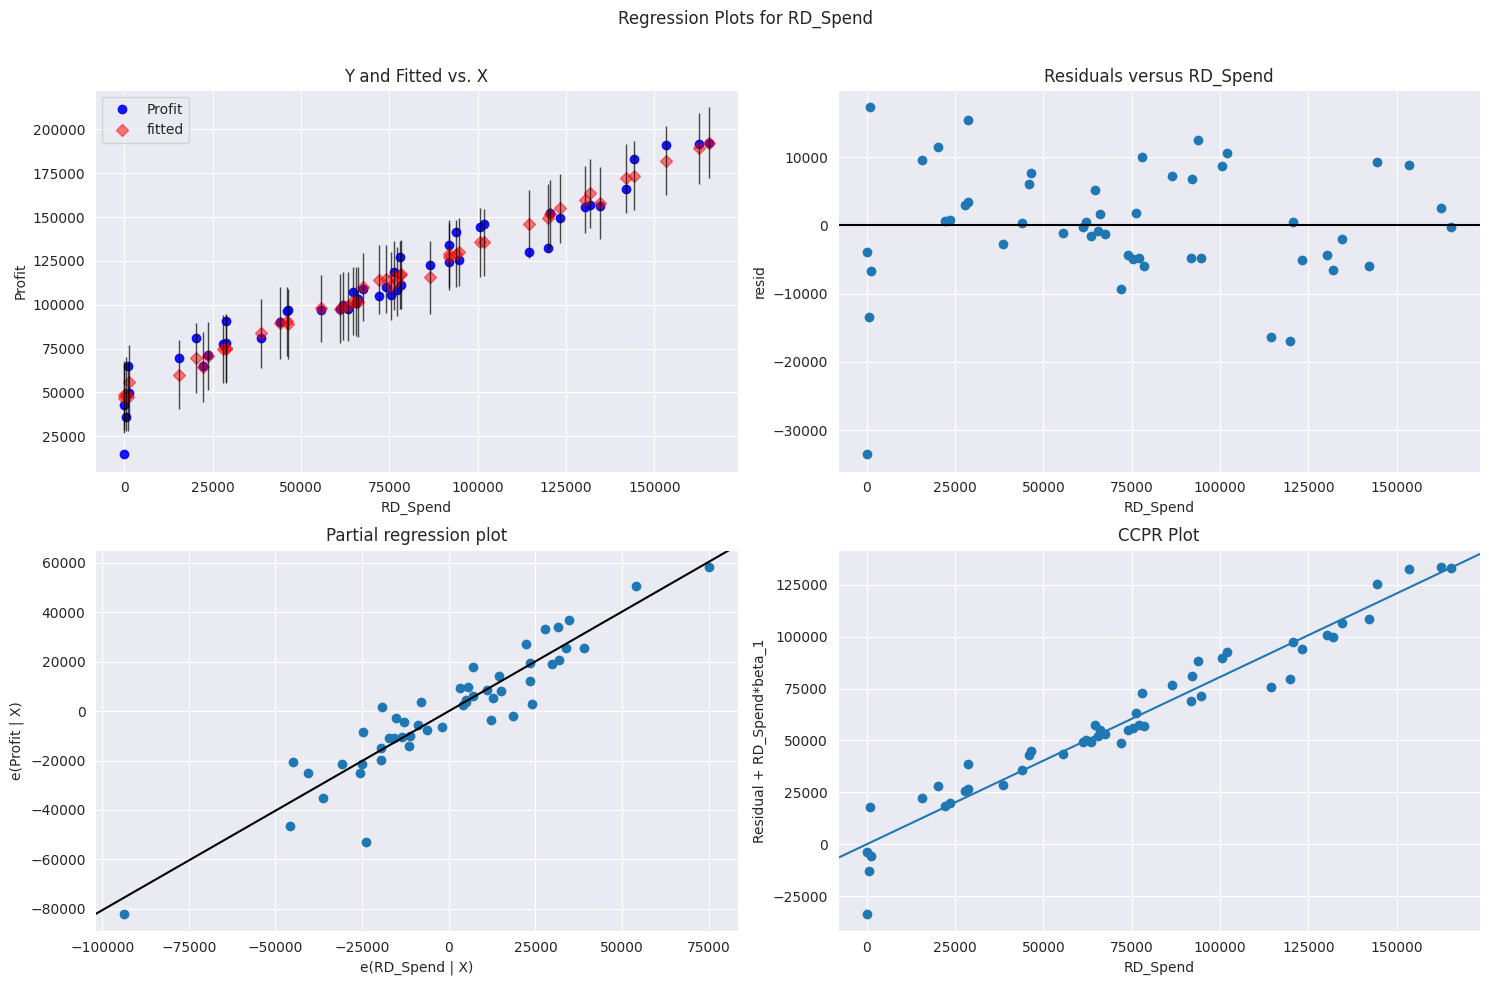

In [48]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"RD_Spend",  fig=fig)
plt.show()

for influncers and outliers we are going to use Cooks Distance

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
## this code for cooks distance
model_influence = model.get_influence()  ## this method will return 2 values : cooks distance and p value   ## ''we have called''  get-influnce method
(c,_) = model_influence.cooks_distance ## we dont need( C ' is cooks distance value') p value so we placed_here. that is temporary place holder (- for skip the value)
## identify the outliers - remove the data points angain this again and again till - until dont get any outliers
## to identify the outliers there are two methods cooks distance and leverage point
## it will take all the columns
## 'get_influnce method' - this will return cooks distance and p value


In [50]:
len(data_sort)

50

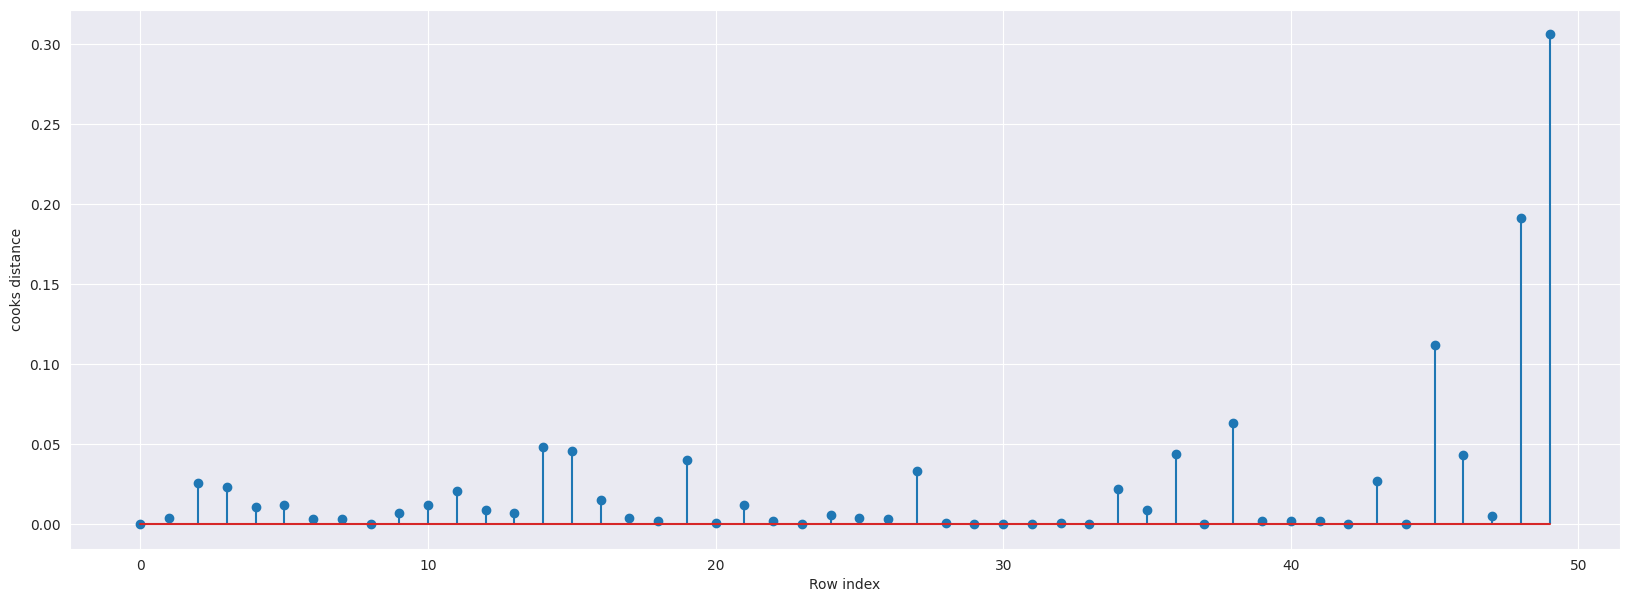

In [51]:
## plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_sort)), np.round(c, 3))  ## index values of columns x axis
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [52]:
## index and value of influncers where c is more than 1.
## the cooks distance is considred high if it is greater than 0.5 and extreme if it greater than 1.
(np.argmax(c),np.max(c))  ## argmax() gives index values of max value in data set
##  80 point is having high cooks distance  so this is so extreme value

(49, 0.30602819546993354)

In [53]:
data_sort.shape

(50, 5)

In [54]:
data_sort.shape[1]

5

In [55]:
data_sort.shape[0]

50

In [56]:
## find out what is maximun of c

In [57]:
## leverage method
k = data_sort.shape[1]   ##k is number of variables
n = data_sort.shape[0]     ## total number of data points
leverage_cutoff = 3*(k + 1)/n
leverage_cutoff

0.36

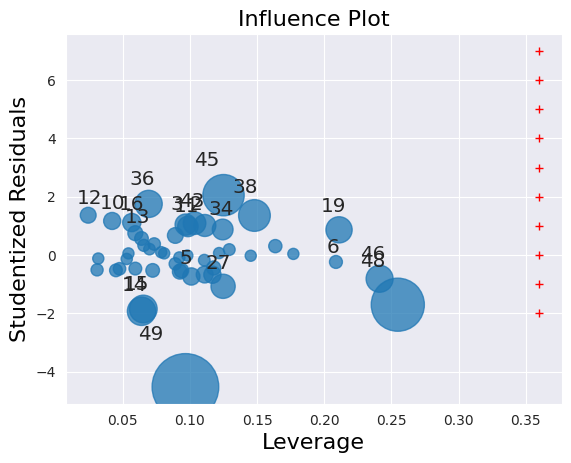

In [58]:
from statsmodels.graphics.regressionplots import influence_plot

import matplotlib.pyplot as plt

influence_plot(model, alpha=0.5)
y=[i for i in range(-2, 8)] ## -2 to 8:10 values for printing + in red color  ## it is a list[] ## list comprehension  ## i is iteration -starts from -2 to 7
x=[leverage_cutoff for i in range(10)]  ## 10 values for printing + in red color  ## same number of elements should be there
plt.plot(x,y, 'r+')  ## from matplot lib ## r+ for + sign to print

plt.show()

In [64]:
data_sort.tail(1)

,Profit,RD_Spend,Administration,Marketing_Spend,State
49,14681.4,0.0,116983.8,45173.06,0


In [67]:
new_df1 = pd.DataFrame({'RD_Spend':0, 'Administration':15000, 'Marketing_Spend':45000,'State':0}, index=["index 1"])

In [68]:
model.predict(new_df1)

index 1    50965.363781
dtype: float64